In [1]:
import pandas as pd
import numpy as np

Loading Datasets all 5

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')


In [3]:
print(movies)

       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
87580   292731           The Monroy Affaire (2022)   
87581   292737          Shelter in Solitude (2023)   
87582   292753                         Orca (2023)   
87583   292755              The Angry Breed (1968)   
87584   292757           Race to the Summit (2023)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                              

In [4]:
print(ratings)

          userId  movieId  rating   timestamp
0              1       17     4.0   944249077
1              1       25     1.0   944250228
2              1       29     2.0   943230976
3              1       30     5.0   944249077
4              1       32     5.0   943228858
...          ...      ...     ...         ...
32000199  200948    79702     4.5  1294412589
32000200  200948    79796     1.0  1287216292
32000201  200948    80350     0.5  1294412671
32000202  200948    80463     3.5  1350423800
32000203  200948    87304     4.5  1350423523

[32000204 rows x 4 columns]


In [5]:
print(links)

       movieId    imdbId     tmdbId
0            1    114709      862.0
1            2    113497     8844.0
2            3    113228    15602.0
3            4    114885    31357.0
4            5    113041    11862.0
...        ...       ...        ...
87580   292731  26812510  1032473.0
87581   292737  14907358   986674.0
87582   292753  12388280   948139.0
87583   292755     64027   182776.0
87584   292757  28995566  1174725.0

[87585 rows x 3 columns]


In [6]:
print(tags)

         userId  movieId             tag   timestamp
0            22    26479     Kevin Kline  1583038886
1            22    79592        misogyny  1581476297
2            22   247150      acrophobia  1622483469
3            34     2174           music  1249808064
4            34     2174           weird  1249808102
...         ...      ...             ...         ...
2000067  162279    90645      Rafe Spall  1320817734
2000068  162279    91079   Anton Yelchin  1322337407
2000069  162279    91079  Felicity Jones  1322337400
2000070  162279    91658     Rooney Mara  1325828398
2000071  162279   100714     Julie Delpy  1373095449

[2000072 rows x 4 columns]


In [7]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [20]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int32         
 1   movieId    int32         
 2   rating     float32       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float32(1), int32(2)
memory usage: 610.4 MB
None


In [21]:
print(links.head())

   movieId  imdbId   tmdbId                               imdb_url
0        1  114709    862.0  https://www.imdb.com/title/tt0114709/
1        2  113497   8844.0  https://www.imdb.com/title/tt0113497/
2        3  113228  15602.0  https://www.imdb.com/title/tt0113228/
3        4  114885  31357.0  https://www.imdb.com/title/tt0114885/
4        5  113041  11862.0  https://www.imdb.com/title/tt0113041/


In [22]:
print(tags.head())

   userId  movieId          tag   timestamp
0      22    26479  Kevin Kline  1583038886
1      22    79592     misogyny  1581476297
2      22   247150   acrophobia  1622483469
3      34     2174        music  1249808064
4      34     2174        weird  1249808102


Checking the missing values

In [23]:
print(movies.isnull().sum())
print(ratings.isnull().sum())

movieId     0
title       0
genres      0
imdb_url    0
imdbId      0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [24]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'],unit = 's')

In [25]:
links['imdb_url'] = 'https://www.imdb.com/title/tt' + links['imdbId'].astype(str).str.zfill(7) + '/'
movies = movies.merge(links[['movieId', 'imdb_url']], on='movieId', how='left')


In [26]:
from scipy.sparse import coo_matrix

# Create sparse matrix directly from ratings data
rows = ratings['userId'].astype('category').cat.codes
cols = ratings['movieId'].astype('category').cat.codes
data = ratings['rating']

sparse_matrix = coo_matrix((data, (rows, cols)))


In [27]:
ratings['userId'] = ratings['userId'].astype('int32')
ratings['movieId'] = ratings['movieId'].astype('int32')
ratings['rating'] = ratings['rating'].astype('float32')


In [28]:
min_ratings = 10
valid_movies = ratings['movieId'].value_counts()[ratings['movieId'].value_counts() > min_ratings].index
valid_users = ratings['userId'].value_counts()[ratings['userId'].value_counts() > min_ratings].index

filtered_ratings = ratings[ratings['movieId'].isin(valid_movies) & ratings['userId'].isin(valid_users)]


In [32]:
print(links.columns)


Index(['movieId', 'imdbId', 'tmdbId', 'imdb_url'], dtype='object')


In [35]:
if 'imdbId' in movies.columns:
    movies = movies.drop(columns=['imdbId'])


In [36]:
movies = movies.merge(links[['movieId', 'imdbId']], on='movieId', how='left')


In [37]:
movies = movies.merge(links[['movieId', 'imdbId']], on='movieId', how='left', suffixes=('', '_links'))

if 'imdbId_links' in movies.columns:
    movies = movies.drop(columns=['imdbId_links'])


In [38]:
import pandas as pd

# Load MovieLens data
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')

# Merge imdbId from links into movies based on movieId
movies = movies.merge(links[['movieId', 'imdbId']], on='movieId', how='left')

# Create new imdb_url column combining 'imdbId' with IMDb URL prefix
movies['imdb_url'] = 'https://www.imdb.com/title/tt' + movies['imdbId'].astype(str).str.zfill(7) + '/'

# Optional: save updated DataFrame with URL to a new CSV file
movies.to_csv('movies_with_imdb_url.csv', index=False)

# View result sample
print(movies[['movieId', 'title', 'imdb_url']].head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                imdb_url  
0  https://www.imdb.com/title/tt0114709/  
1  https://www.imdb.com/title/tt0113497/  
2  https://www.imdb.com/title/tt0113228/  
3  https://www.imdb.com/title/tt0114885/  
4  https://www.imdb.com/title/tt0113041/  


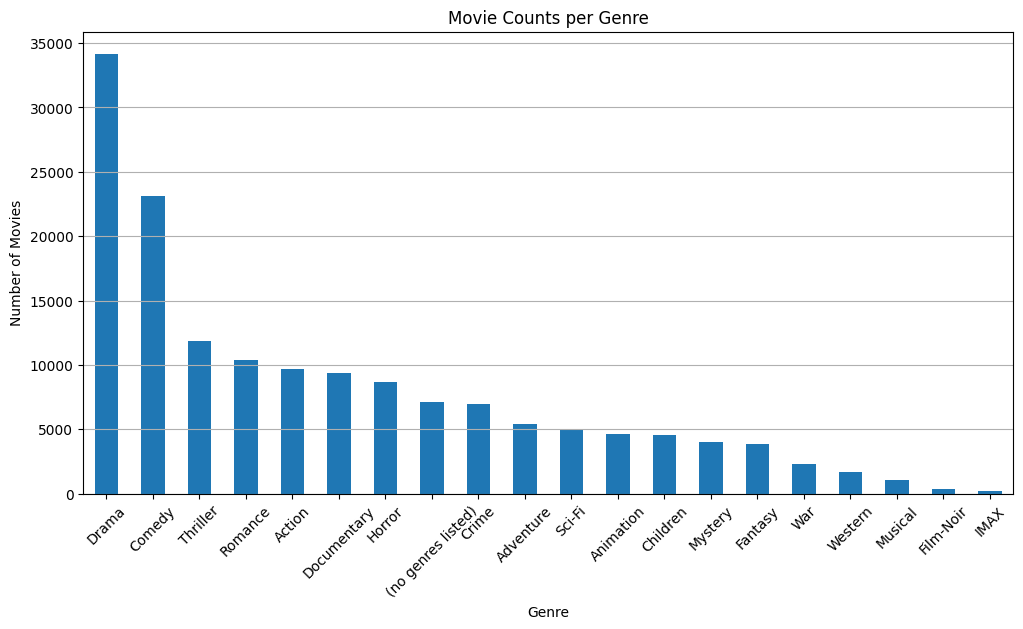

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming movies DataFrame has a 'genres' column with pipe-separated genres
movies = pd.read_csv('movies_with_imdb_url.csv')

# Split the genres column and explode into rows
movies['genres'] = movies['genres'].str.split('|')
all_genres = movies.explode('genres')

# Count the number of movies per genre
genre_counts = all_genres['genres'].value_counts()

# Plotting the counts
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Movie Counts per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
